In [ ]:
import numpy as np

# For loading model
from keras.models import load_model
# from segmentation_models.losses import dice_loss

# For loading images and computing the Intersection over Union (IoU)
from Utils.Util import IoU, load

# Plotting examples
import matplotlib.pyplot as plt
%matplotlib inline

# Showing progress
from tqdm import tqdm_notebook

In [ ]:
Unet = load_model("Unet.h5", compile=False)

In [ ]:
TEST_PATH = "C:/BAGLS/test/"

# All test images
N = 3500 

test_imgs = [TEST_PATH + str(i) + ".png" for i in range(N)]
test_segs = [TEST_PATH + str(i) + "_seg.png" for i in range(N)]

In [ ]:
ground_truths = []
predictions = []

# Iterate across test set
for i, (im_fn, gt_fn) in enumerate(tqdm_notebook(zip(test_imgs, test_segs), total=N)):
    # Load and pre-process images
    im, gt = load(im_fn, gt_fn)
    
    # Predict segmentation using the trained deep neural network
    pr = Unet.predict(im[None,...,None]).round().squeeze()
    
    ground_truths.append(gt)
    predictions.append(pr)
    
    if i == 0:
        # Show example segmentation of the network
        # Left to right: Image input, ground truth, prediction
        plt.figure(figsize=(12,5))
        plt.title("Predicting segmentation of {}, IoU = {:.3f}".format(im_fn, IoU([gt], [pr]).mean(0)))
        plt.imshow(np.hstack((im, gt, pr)), cmap='gray')
        
IoUs = IoU(ground_truths, predictions)
print("Mean IoU across test set: ", IoUs.mean(0))

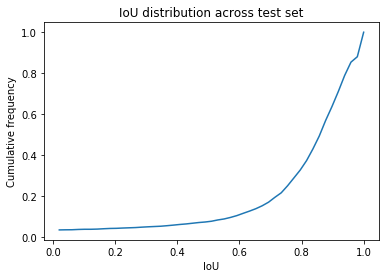

In [5]:
vals, bins = np.histogram(IoUs, bins=np.linspace(0,1))

plt.title("IoU distribution across test set")
plt.plot(bins[1:], vals.cumsum()/vals.cumsum().max())
plt.xlabel('IoU')
plt.ylabel('Cumulative frequency');